<a href="https://colab.research.google.com/github/bigjoo99/HandLang_project/blob/main/HandLang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Accuracy 평가**

pandas 이용하여 학습 데이터 불러오기

In [81]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/bigjoo99/HandLang_project/main/getData.txt', names=['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','v11','v12','v13','v14','v15','label'])

학습 데이터 확인

In [82]:
data

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,label
0,32.475960,25.587929,8.252770,25.815522,144.366824,20.521152,153.119167,171.395545,157.538166,143.199414,171.882595,171.408446,146.234357,166.588569,167.465896,0.0
1,31.606072,25.710666,6.519657,26.173296,143.745670,19.952463,151.712657,172.221686,156.749018,143.046840,172.012460,171.795896,146.550308,166.109924,167.001468,0.0
2,30.390004,25.734120,7.356103,27.159364,143.616866,19.383633,151.881650,172.402187,158.163917,142.416861,171.645398,172.286008,146.364281,165.717341,167.060126,0.0
3,31.614848,24.719924,8.405087,24.753390,145.194042,22.404418,154.930414,171.543602,158.543800,143.679277,172.226178,171.611250,145.433540,167.020346,168.733117,0.0
4,33.461137,25.121808,9.622665,24.826552,144.852757,22.531676,154.263942,172.320347,158.218319,143.096537,172.649381,171.384379,143.902039,167.246355,169.031408,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,13.637745,4.437827,18.915880,33.798126,132.594291,66.320045,135.192056,177.609946,127.396172,134.222130,168.078797,137.142940,133.899248,160.153600,150.526114,28.0
6213,12.840574,5.365858,19.456192,32.923410,133.482656,66.832332,135.573651,176.796588,127.413598,134.643829,168.857518,136.646297,131.804588,160.987585,150.974406,28.0
6214,13.415913,7.073638,18.543359,31.722039,134.383037,61.393321,137.035118,176.208448,130.875017,135.543597,168.301235,143.177745,132.778474,160.659083,152.975265,28.0
6215,13.062817,4.784622,20.063379,31.302324,134.945269,58.010853,137.097486,175.321165,131.191599,136.519820,167.937522,143.362089,133.701673,159.253567,152.183998,28.0


# 데이터셋 분리
학습 데이터 0.8 : 검증 데이터 0.2

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = data.iloc[:,:-1] #마지막 열을 제외한 모든 열을 특성으로 사용
y = data.iloc[:,-1] #마지막 열을 레이블로 사용

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =42)

print("학습 데이터 수:",len(X_train))
print("검증 데이터 수:",len(X_test))
print("학습 라벨 수:",len(y_train))
print("검증 라벨 수:",len(y_test))

학습 데이터 수: 4973
검증 데이터 수: 1244
학습 라벨 수: 4973
검증 라벨 수: 1244


K값을 3으로 두고 모델 성능 확인

In [84]:
# k = 3 일 때 accuracy
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

predict = knn.predict(X_test)

accuracy = knn.score(X_test,y_test)
print("정확도:", accuracy)

정확도: 0.9967845659163987


K값을 1~100으로 두고 성능 확인

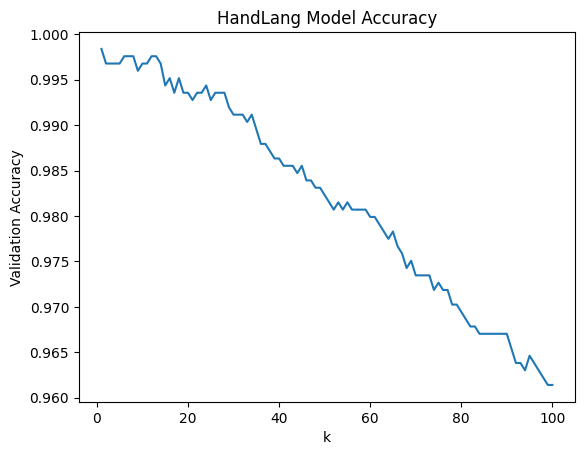

In [85]:
import matplotlib.pyplot as plt

# k의 범위 1~100
k_list = range(1,101)
accuracies = []
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  accuracies.append(knn.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("HandLang Model Accuracy")
plt.show()

K값을 1~20으로 범위 줄이고 성능 재확인

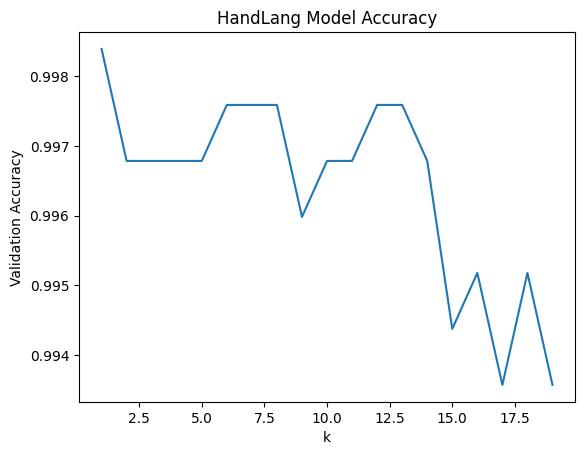

In [86]:
import matplotlib.pyplot as plt

#k의 범위 1~20
k_list = range(1,20)
accuracies = []
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  accuracies.append(knn.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("HandLang Model Accuracy")
plt.show()

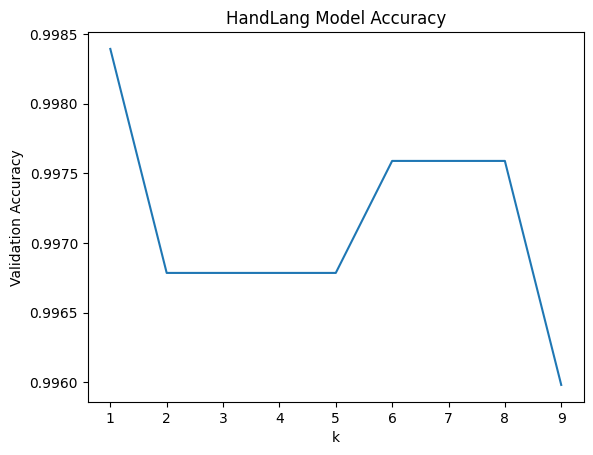

In [87]:
import matplotlib.pyplot as plt

k_list = range(1,10)
accuracies = []
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  accuracies.append(knn.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("HandLang Model Accuracy")
plt.show()

In [88]:
# k = 3 일 때 accuracy
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

predict = knn.predict(X_test)

accuracy = knn.score(X_test,y_test)
print("k = 3 일때 정확도:", accuracy)

# k = 6 일 때 accuracy
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

predict = knn.predict(X_test)

accuracy = knn.score(X_test,y_test)
print("k = 6 일때 정확도:", accuracy)

k = 3 일때 정확도: 0.9967845659163987
k = 6 일때 정확도: 0.997588424437299


In [89]:
# k = 3 일 때 accuracy
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

predict = knn.predict(X_test)

accuracy = knn.score(X_test,y_test)
print("정확도:", accuracy)

정확도: 0.9983922829581994


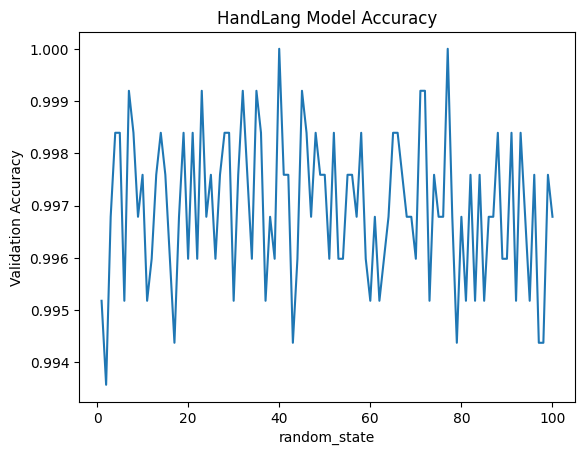

In [90]:
import matplotlib.pyplot as plt

random_state_list = range(1,101)
random_states = []
for k in random_state_list:
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = k)
  knn = KNeighborsClassifier(n_neighbors = 6)
  knn.fit(X_train, y_train)
  random_states.append(knn.score(X_test, y_test))
plt.plot(random_state_list, random_states)
plt.xlabel("random_state")
plt.ylabel("Validation Accuracy")
plt.title("HandLang Model Accuracy")
plt.show()